<a href="https://colab.research.google.com/github/ArvindRe/Springboard/blob/master/GuidedCapstoneStep6HL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [ ]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.util.testing as tm
%matplotlib inline
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import io
df=pd.read_csv(io.StringIO(uploaded['step3_output.csv'].decode('utf-8')),index_col=0)  # removing Unnamed : 0 with index_col
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving step3_output.csv to step3_output.csv
User uploaded file "step3_output.csv" with length 22930 bytes


,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,2
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,1
5,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,0.0,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,1
8,Boreal Mountain Resort,California,7700,500,0,0.0,0,1,1,3,1,2,8,33.0,6.0,1.0,380.0,200.0,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,1
9,Dodge Ridge,California,8200,1600,0,0.0,0,0,1,2,5,4,12,67.0,5.0,2.0,862.0,0.0,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,1


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [ ]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend','state','summit_elev'],axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df.loc[:,'AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)  #?

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)  #?
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1) ####Not needed at this part
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred=model.predict(X_test)
print(y_pred)
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
mean_absolute_error=mean_absolute_error(y_test, y_pred)
explained_variance_score=explained_variance_score(y_test, y_pred)
print('explained_variance_score:',explained_variance_score)
print('mean_absolute_error:',mean_absolute_error)
print('intercept:', lm.intercept_)
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
# pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
df_coef=pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient')
df_coef

[80.64914133 55.69426024 58.05625499 65.33235986 49.93014441 55.15166533
 66.97919156 73.72734002 49.68974052 56.09908025 82.10414705 74.99109618
 60.99455543 75.10613776 31.47703321 59.00134864 47.16714653 50.24115433
 53.91114144 44.84540564 58.16119826 69.94520554 60.93148575 52.98322722
 42.74753997 40.79487513 53.6180587  55.26966388 75.02519268 39.94511374
 52.50799915 75.99950244 85.56800309 68.60849285 55.66491336 54.64168396
 34.12845963 69.59441309 53.55668916 43.77450563 32.80370832 44.16426288
 50.67405788 38.80188111]
explained_variance_score: 0.757511314633211
mean_absolute_error: 6.502592301742857
intercept: 56.79826953002002


,Coefficient
fastSixes,0.000000e+00
fastEight,4.440892e-16
trams,3.108624e-15
Runs,1.357854e-01
fastQuads,1.742994e-01
NightSkiing_ac,3.664356e-01
projectedDaysOpen,3.686266e-01
yearsOpen,5.688913e-01
total_chairs,8.534673e-01
Snow Making_ac,8.974939e-01


## Review the results 

In [ ]:
#X.head()
X.dtypes

vertical_drop          int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
clusters               int64
dtype: object

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import io
df_predict=pd.read_csv(io.StringIO(uploaded['1589505302_05152020_updated_ski_data_-_updated_ski_data.csv'].decode('utf-8')))
df_predict.head()

Saving 1589505302_05152020_updated_ski_data_-_updated_ski_data.csv to 1589505302_05152020_updated_ski_data_-_updated_ski_data.csv
User uploaded file "1589505302_05152020_updated_ski_data_-_updated_ski_data.csv" with length 35431 bytes


,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [ ]:
#Removing NaNs
df_predict['fastEight']=df_predict['fastEight'].fillna(0)
df_predict['NightSkiing_ac']=df_predict['NightSkiing_ac'].fillna(0)
df_predict['AdultWeekday'].fillna((df_predict['AdultWeekday'].mean()), inplace=True)
df_predict['TerrainParks']=df_predict['TerrainParks'].fillna(0)
df_predict['Snow Making_ac']=df_predict['Snow Making_ac'].fillna(0)
df_predict['SkiableTerrain_ac']=df_predict['SkiableTerrain_ac'].fillna(0)
df_predict['daysOpenLastYear'].fillna((df_predict['daysOpenLastYear'].mean()), inplace=True)
df_predict['projectedDaysOpen'].fillna((df_predict['projectedDaysOpen'].mean()), inplace=True)
df_predict['averageSnowfall'].fillna((df_predict['averageSnowfall'].mean()), inplace=True)
df_predict['LongestRun_mi'].fillna((df_predict['LongestRun_mi'].mean()), inplace=True)
df_predict['Runs'].fillna((df_predict['Runs'].mean()), inplace=True)
df_predict['yearsOpen'].fillna((df_predict['yearsOpen'].mean()), inplace=True)
df_predict['AdultWeekend'].fillna((df_predict['AdultWeekend'].mean()), inplace=True)
import pandas as pd
nas=pd.DataFrame(df_predict.isnull().sum().sort_values(ascending=False)/len(df_predict),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


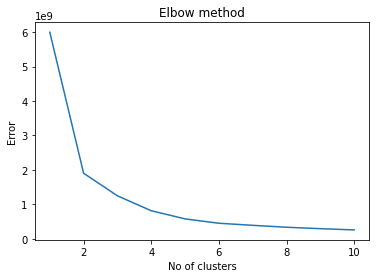

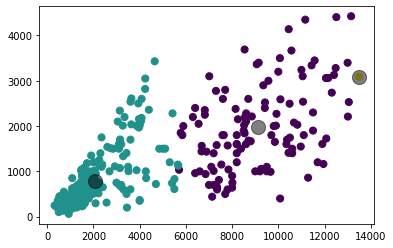

In [ ]:
#Cluster Column
from sklearn.cluster import KMeans
xk = df_predict.drop(['Name','Region','state','base_elev'], axis =1).values
Error =[]
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i).fit(xk)
   kmeans.fit(xk)
   Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(xk)
plt.scatter(xk[:, 0], xk[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# Make a new column in your df_predict dataframe called 'clusters', and assign it the variable: y_kmeans3
df_predict['clusters']=y_kmeans3

In [ ]:
resort=df_predict[df_predict['Name'].str.contains('Big Mountain Resort')]  #With the other dataset
resort.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Big Mountain Resort,Montana,Montana,6817,2353,4464,0,0.0,0,3,2,6,0,3,14,105.0,4.0,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [ ]:
X_resort = resort.drop(['Name','Region','AdultWeekend','state', 'summit_elev','base_elev','AdultWeekend'], axis=1)

y_resort = resort.loc[:,'AdultWeekend']

#scaler_resort = preprocessing.StandardScaler().fit(X_resort)

X_scaled_resort=scaler.transform(X_resort)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [ ]:
print(lm.predict(X_scaled_resort))  #? inst32 and int64 clash?
#X_resort.dtypes

[83.61393029]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [ ]:
print(y_resort)

151    81.0
Name: AdultWeekend, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

Text(0.5, 1.0, 'summit_elev by vertical_drop by cluster')

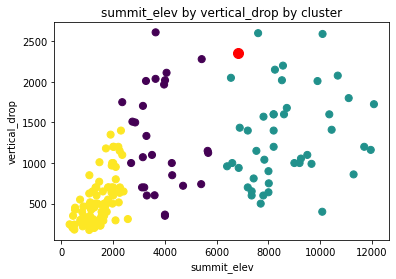

In [ ]:
ac=resort
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='red', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')

Text(0.5, 1.0, 'AdultWeekday by AdultWeekend by cluster')

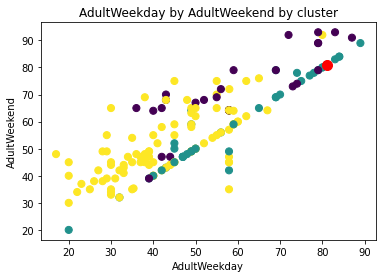

In [ ]:
plt.scatter(df['AdultWeekday'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['AdultWeekday'], ac['AdultWeekend'], c='red', s=100)
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekday by AdultWeekend by cluster')

Text(0.5, 1.0, 'quad by AdultWeekend by cluster')

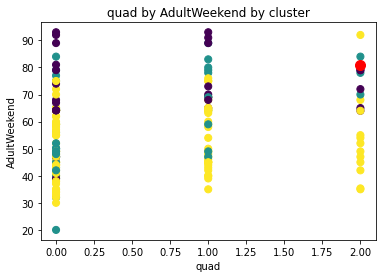

In [ ]:
plt.scatter(df['quad'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['quad'], ac['AdultWeekend'], c='red', s=100)
plt.xlabel('quad')
plt.ylabel('AdultWeekend')
plt.title('quad by AdultWeekend by cluster')

Text(0.5, 1.0, 'Week day vs Weekend')

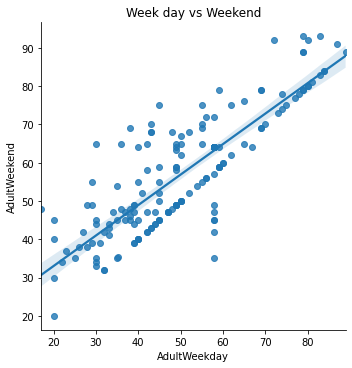

In [ ]:
sns.lmplot(x='AdultWeekday',y='AdultWeekend', data=df)
plt.xlabel('AdultWeekday')
plt.ylabel('AdultWeekend')
plt.title('Week day vs Weekend')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [ ]:
#import pickle
#s = pickle.dumps(model)
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib') 

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': folder_id}]})
file.SetContentFile('data.pkl')
file.Upload() 

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score,mean_absolute_error
coeff = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coeff['Feature'] = X.columns
coeff['MAE'] = mean_absolute_error(y_test, y_pred)
coeff['ExVariance'] = explained_variance_score(y_test, y_pred)

In [ ]:
coeff